In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from skimage.transform import resize
import matplotlib.pyplot as plt
from skimage.io import imread
import pandas as pd
import numpy as np
import os, pickle

import cv2

In [2]:
target = []
flat_data = []
DataDirectory = './DataSet/'

Categories = os.listdir(DataDirectory)

for index, i in enumerate(Categories):
    print(i, '-> ', str(round(100*(index + 1)/len(Categories))) + '%')
    target_class = index
    path = os.path.join(DataDirectory,i)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        img_resized = resize(img_array,(40,40,3))
        flat_data.append(img_resized.flatten())
        target.append(target_class)

flat_data = np.array(flat_data)
target = np.array(target)

2 ->  3%
3 ->  7%
4 ->  10%
5 ->  13%
6 ->  17%
7 ->  20%
8 ->  23%
9 ->  27%
a ->  30%
b ->  33%
c ->  37%
d ->  40%
e ->  43%
f ->  47%
g ->  50%
h ->  53%
k ->  57%
m ->  60%
n ->  63%
p ->  67%
q ->  70%
r ->  73%
s ->  77%
t ->  80%
u ->  83%
v ->  87%
w ->  90%
x ->  93%
y ->  97%
z ->  100%


In [33]:
df = pd.DataFrame(flat_data)
df['Target'] = target
print(df)

           0       1       2       3       4       5       6       7       8  \
0     0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1     0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
2     0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
3     0.0625  0.0625  0.0625  0.0125  0.0125  0.0125  0.0875  0.0875  0.0875   
4     0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
7130  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
7131  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
7132  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
7133  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
7134  0.3000  0.3000  0.3000  0.1000  0.1000  0.1000  0.5000  0.5000  0.5000   

             9  ...    4791    4792    

In [4]:
x = df.iloc[:,:-1].values
y = target

print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, test_size = 0.2, random_state = 109, stratify = y)

print("Dimensions of input training data:",x_train.shape)
print("Dimensions of input testing data:",x_test.shape)
print("Dimensions of output training data:",y_train.shape)
print("Dimensions of output testing data:",y_test.shape)

Input data dimensions: (7135, 4800)
Output data dimensions: (7135,)
Dimensions of input training data: (5708, 4800)
Dimensions of input testing data: (1427, 4800)
Dimensions of output training data: (5708,)
Dimensions of output testing data: (1427,)


In [5]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
filename = 'finalized_model.sav'
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [7]:
y_pred = knn.predict(x_test)
print(y_test)
print(y_pred)
ac = accuracy_score(y_test,y_pred)
print(ac)

[ 2 15 23 ...  9 12 13]
[ 2 15 23 ...  9 12 13]
0.9677645409950946


In [12]:
def sharp_img(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Grayscale Image')
    plt.show()

    blur_image = cv2.blur(gray_img, (4, 4))
    plt.imshow(blur_image, cmap='gray')
    plt.title('Blurred Image')
    plt.show()

    gblur_img = cv2.GaussianBlur(blur_image, (0, 0), 6)
    plt.imshow(gblur_img, cmap='gray')
    plt.title('Gaussian Blurred Image')
    plt.show()

    # Step 4: Sharpen the image
    sharp_img = cv2.addWeighted(gray_img, 1.80, gblur_img, -0.60, 0)
    plt.imshow(sharp_img, cmap='gray')
    plt.title('Sharpened Image')
    plt.show()

    sharp_not_img = cv2.bitwise_not(sharp_img)
    plt.imshow(sharp_not_img, cmap='gray')
    plt.title('Inverted Image')
    plt.show()

    _, img_zeroone = cv2.threshold(sharp_not_img, 20, 255, cv2.THRESH_BINARY)
    plt.imshow(img_zeroone, cmap='gray')
    plt.title('Binary Image')
    plt.show()

    return img_zeroone

In [13]:
def clear_img(img):
    im = cv2.imread("mask.png")
    mask = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    plt.imshow(mask, cmap='gray')
    plt.title("Grayscale Mask")
    plt.show()

    _, t_mask = cv2.threshold(mask, 70, 255, cv2.THRESH_BINARY)
    plt.imshow(t_mask, cmap='gray')
    plt.title("Binary Mask")
    plt.show()

    masker = cv2.bitwise_not(t_mask)
    plt.imshow(masker, cmap='gray')
    plt.title("Inverted Mask")
    plt.show()

    try:
        img = cv2.bitwise_and(img, masker) 
    except:
        pass
    plt.imshow(img, cmap='gray')
    plt.title("Masked Image")
    plt.show()

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2)) 
    opening_img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel) 
    plt.imshow(opening_img, cmap='gray')
    plt.title("Morphologically Opened Image")
    plt.show()

    return opening_img

In [14]:
def show_image(image):
    cv2.imshow("image", image)
    c = cv2.waitKey()
    if c >= 0:
        return -1
    return 0

In [15]:
def isContain(c, contours):
    for item in contours:
        xC, yC, wC, hC = cv2.boundingRect(c)
        xItem, yItem, wItem, hItem = cv2.boundingRect(item)
        if (xC - xItem) in range(6) and (yC - yItem) in range(6) and wC < wItem and hC < hItem:
            return True
        if wC < 5 or hC < 5:
            return True
    return False


In [16]:
def bestContours(contours):

    contoursDict = {}
    for index, item in enumerate(contours):
        if not isContain(item, contours):
            contoursDict[index] = len(item)
    sortedItems = sorted(contoursDict.items(), key=lambda x: x[1], reverse=True)[:5]
    keys = [item[0] for item in sortedItems]

    returnedTuple = []
    for index, item in enumerate(contours):
        if index in keys:
            returnedTuple.append(item)
    return tuple(returnedTuple)

In [24]:
def getWords(INPUT_IMAGE, OUTPUT=None):

    im = cv2.imread(INPUT_IMAGE)
    sim = sharp_img(im)


    cl_img = clear_img(sim)
    contours, hierarchy = cv2.findContours(cl_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    output_image = cv2.cvtColor(cl_img, cv2.COLOR_GRAY2BGR)

    # Draw contours
    cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)
    
    cv2.imshow("Contours", output_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    contours = bestContours(contours)

    indices = {}
    clusters = []
    for index, c in enumerate(contours):
        x, y, w, h = cv2.boundingRect(c)
        ROI = cl_img[y : y + h, x : x + w] #crop
        indices[index] = x
        clusters.append(ROI)
    sortedItems = sorted(indices.items(), key=lambda x: x[1])
    cluster = [clusters[item[0]] for item in sortedItems]
    return cluster

In [25]:
def getCaptchaText(Captcha):
    plt.imshow(plt.imread(Captcha))
    plt.show()
    clusters = getWords(Captcha)
    text = ''

    # Create a figure with subplots to display all images together
    n_clusters = len(clusters)
    cols = 5  # Number of columns in the grid
    rows = (n_clusters + cols - 1) // cols  # Calculate rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 1, rows * 1))
    axes = axes.flatten()  # Flatten to easily iterate over axes

    for i, image in enumerate(clusters):
        flat_data = []
        img_resized = resize(image, (40, 40, 3))
        flat_data.append(img_resized.flatten())
        flat_data = np.array(flat_data)
        y_output = loaded_model.predict(flat_data)
        
        axes[i].imshow(img_resized, cmap='gray')
        axes[i].set_title(Categories[y_output[0]].replace('upper', '').replace('lower', ''))
        axes[i].axis('off')  # Remove axes for a cleaner look
        text += Categories[y_output[0]].replace('upper', '').replace('lower', '')

    # Hide any unused subplots
    for j in range(len(clusters), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()  # Show all images in one figure
    return text

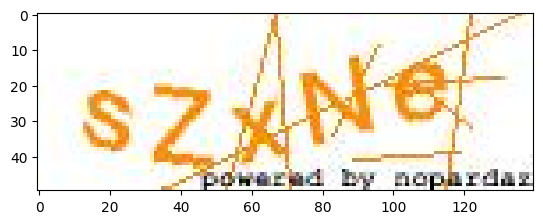

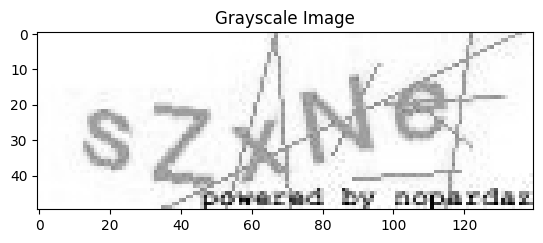

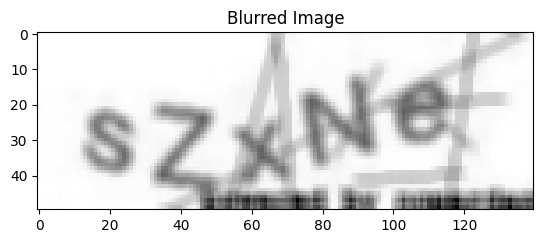

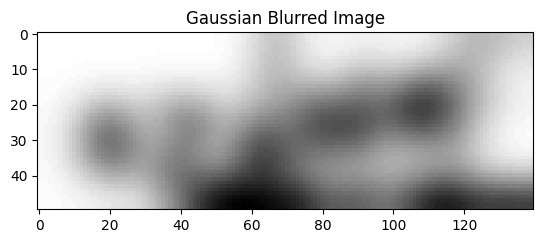

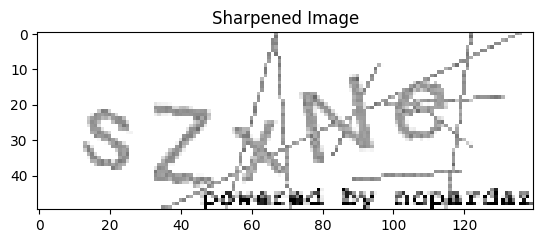

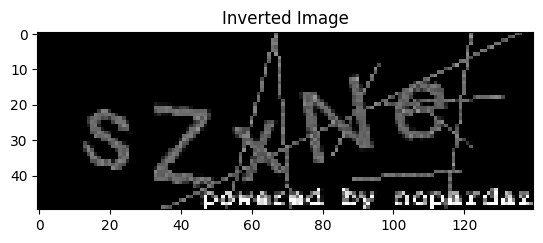

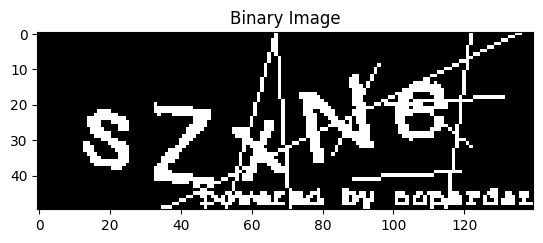

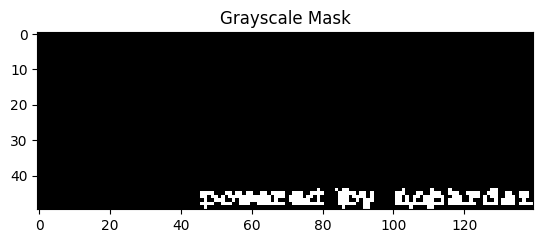

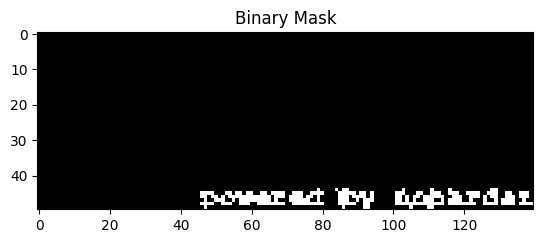

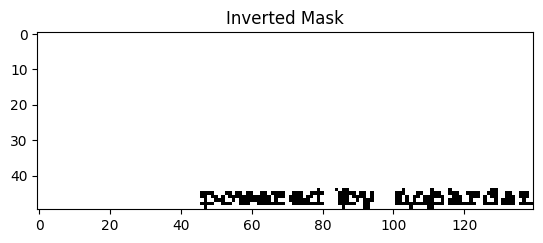

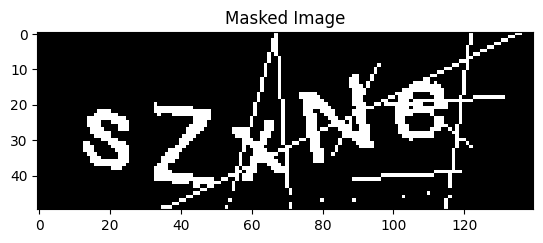

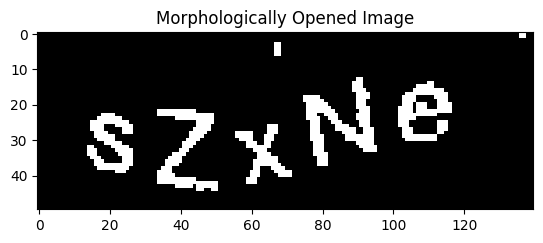

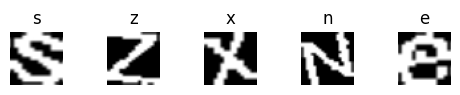

Predicted Text Is: szxne


In [34]:
Captcha = './Golestan-Captchas/ml.gif'
text = getCaptchaText(Captcha)
print("Predicted Text Is:", text)